In [2]:
using Plots
using DelimitedFiles
using DataFrames
using ColorSchemes

ROOT_FOLDER = @__DIR__
include(ROOT_FOLDER * "/../setup/graphic-setup.jl")

In [12]:
DataFolder = "/home/nepero27178/Thesis/LadderHubbardSC/Project/HartreeFock/simulations/scan/Setup=B[256]/"
FilePath = DataFolder * "AF.txt"
FakeFilePath = replace(DataFolder, "scan" => "special/forced-scan") * "AF.txt"#DataFolder * "FakeAF.txt"

Data = readdlm(FilePath, ';')
FakeData = readdlm(FakeFilePath, ';')
"done"

"done"

In [13]:
DF = DataFrame(Data[2:end,:], Data[1,:])
FakeDF = DataFrame(FakeData[2:end,:], FakeData[1,:])
"done"

"done"

In [16]:
δδ = unique(DF.δ)
U = 20.0
q = floor(Int64, length(ColorSchemes.winter) / length(δδ) )
P = plot(
    size = (600,400),
    xlabel = L"$V$",
    ylabel = L"$\Delta m$",
    legend = :outertopright,
)
for (i,δ) in enumerate(δδ)
    df = DF[(DF.δ.==δ) .& (DF.U.==U), :]
    fake_df = FakeDF[(FakeDF.δ.==δ) .& (FakeDF.U.==U), :]
    yy = [eval(Meta.parse(df.v[j]))["m"] for j in 1:length(df.v)] .- [eval(Meta.parse(fake_df.v[j]))["m"] for j in 1:length(fake_df.v)]
    plot!(
        df.V, yy,
        markershape = :circle,
        markercolor = ColorSchemes.winter[q*i],
        markersize = 1.5,
        linecolor = ColorSchemes.winter[q*i],
        label = L"$\delta=%$(δ)$",
        legendfonthalign = :left
    )
end
title!(L"$m_{\mathrm{Full}} - m_{\mathrm{Forced}}$ ($U=%$(U)$)")
savefig(P, "FullForced_U=$(U).png")

"/home/nepero27178/Thesis/LadderHubbardSC/Project/HartreeFock/src/labs/FullForced_U=20.0.png"

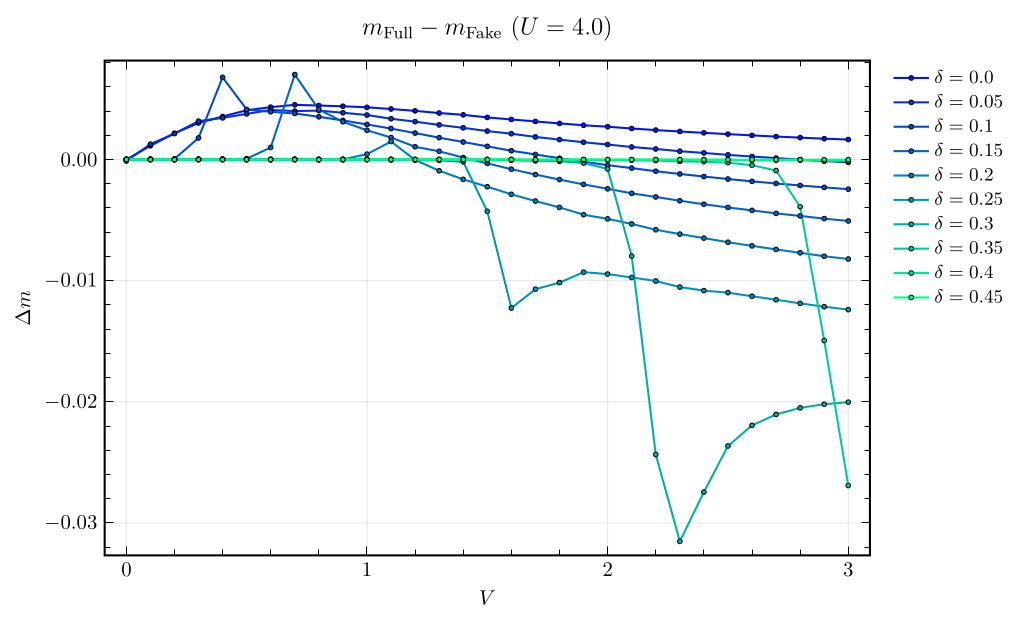

In [7]:
P